In [1]:
#  par défaut l'encoding est en utf-8 pour python 3
# coding: utf-8

# Import des librairies
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import pylab
import re
import time
from datetime import date

In [2]:
# Cellule pour indentifier les versions des packages à inclure dans 'requirements.txt'
# import sklearn as sk
# print(np.__version__)   # 1.19.5
# print(pd.__version__)   # 1.2.4
# print(sk.__version__)   # 0.23.2

In [3]:
# Changer la taille de police par défaut
# plt.rcParams.update({'font.size': 15})

pd.set_option('display.max_row', 1001)
pd.set_option('display.max_column', 400)
# pd.set_option('display.column_space', 200)
# pd.set_option('display.width', 10000)

In [ ]:
# %%javascript
# IPython.OutputArea.auto_scroll_threshold = 50

## BASE de DONNEES

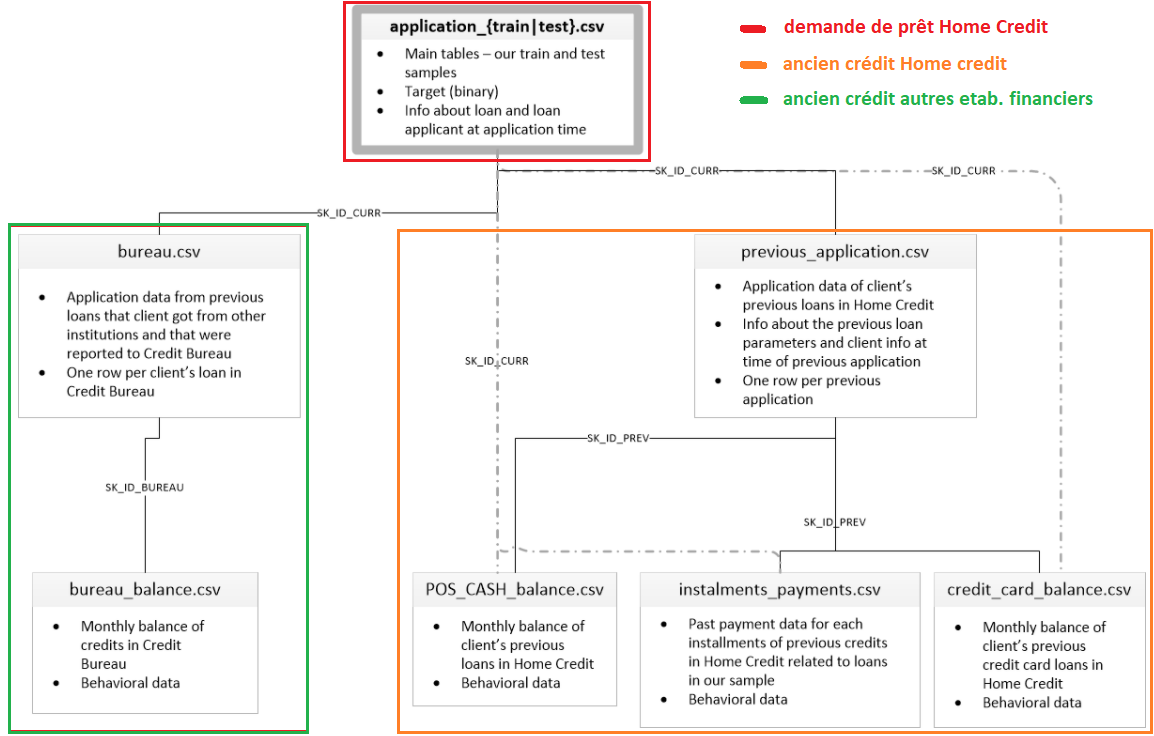

In [237]:
from IPython.display import Image
Image(filename='columns_description.png', width=1000, height=1000)

# Chargement des données

In [ ]:
application_train = pd.read_csv("application_train.csv")
application_test = pd.read_csv("application_test.csv")
bureau = pd.read_csv("bureau.csv")
bureau_balance = pd.read_csv("bureau_balance.csv")
previous_application = pd.read_csv("previous_application.csv")
POS_CASH_balance = pd.read_csv("POS_CASH_balance.csv")
installments_payments = pd.read_csv("installments_payments.csv")
credit_card_balance = pd.read_csv("credit_card_balance.csv")
sample_submission = pd.read_csv("sample_submission.csv")

# Description des données

In [ ]:
nom_df = ['application_train',
          'application_test',
          'bureau',
          'bureau_balance',
          'previous_application',
          'POS_CASH_balance',
          'installments_payments',
          'credit_card_balance',
          'sample_submission']

list_df = [application_train,
           application_test,
           bureau,
           bureau_balance,
           previous_application,
           POS_CASH_balance,
           installments_payments,
           credit_card_balance,
           sample_submission]

In [ ]:
i = 0
for df in list_df:
    print("*****************************************")
    print("       ", nom_df[i])
    print("*****************************************")
    i = i + 1
    #print("Variables: ", df.columns)
    print("Population / Nb_variables : ", df.shape)
    print("Doublons :", df.duplicated().sum())
    print("% NaN    :", (df.isna().sum().sum() / df.shape[0]/df.shape[1])*100, '\n')
    

In [ ]:
i = 0
liste_indices = []
liste_colonnes = []
liste_types = []
liste_uniques = []
liste_nan = []

for df in list_df:

    for column in df.columns:
        liste_indices.append(nom_df[i])
        liste_colonnes.append(column)
        liste_types.append(df[column].dtype)
        liste_uniques.append(df[column].nunique())
        liste_nan.append(df[column].isna().sum())
    i += 1
resume_data = pd.DataFrame([liste_indices,
                            liste_colonnes,
                            liste_types,
                            liste_uniques,
                            liste_nan]
                           ).T
resume_data.columns = ['Fichier', 'Nom variable', 'Type',
                       'Valeurs uniques', 'Valeurs nan']
resume_data

## application_train

In [ ]:
print(application_train.shape)
application_train.head(10)
application_train.sort_values(['SK_ID_CURR'], ascending = False).head(5)


In [ ]:
# 'NAME_CONTRACT_TYPE' et 'OCCUPATION_TYPE',
#   ne seront pas pris en compte pour générer le modéle mais seront affichés dans le dashboard.


# 1. Suppression des colonnes a priori sans intérêt :
col_to_drop = ['NAME_TYPE_SUITE', 'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH',
                'FLAG_MOBIL', 'FLAG_EMP_PHONE', 'FLAG_WORK_PHONE', 'FLAG_CONT_MOBILE', 'FLAG_PHONE', 'FLAG_EMAIL',
                'WEEKDAY_APPR_PROCESS_START', 'HOUR_APPR_PROCESS_START', 
                'REG_REGION_NOT_LIVE_REGION', 'REG_REGION_NOT_WORK_REGION', 'LIVE_REGION_NOT_WORK_REGION', 
                'REG_CITY_NOT_LIVE_CITY', 'REG_CITY_NOT_WORK_CITY', 'LIVE_CITY_NOT_WORK_CITY',
                'AMT_REQ_CREDIT_BUREAU_HOUR', 'AMT_REQ_CREDIT_BUREAU_DAY', 'AMT_REQ_CREDIT_BUREAU_WEEK', 
                'AMT_REQ_CREDIT_BUREAU_MON', 'AMT_REQ_CREDIT_BUREAU_QRT', 'AMT_REQ_CREDIT_BUREAU_YEAR',
                'ORGANIZATION_TYPE', 
                'OWN_CAR_AGE'
                # 'NAME_CONTRACT_TYPE',   # conservé, pas pour le modéle mais pour le dashboard
                #  OCCUPATION_TYPE',      # conservé, pas pour le modéle mais pour le dashboard
                ]
application_train = application_train.drop(col_to_drop, 1)


# 2. Suppression des colonnes de type *_MEDI , *_AVG , *_MODE
cols = [c for c in application_train.columns if c[-5:] != '_MEDI'  if c[-5:] != '_MODE'  if c[-4:] != '_AVG']
application_train = application_train[cols]


# 3. Remplacement de la somme des 'FLAG_DOCUMENT_X' par 'NB_DOCUMENT'
application_train['NB_DOCUMENT'] = application_train['FLAG_DOCUMENT_2'] + application_train['FLAG_DOCUMENT_3']
+ application_train['FLAG_DOCUMENT_4'] + application_train['FLAG_DOCUMENT_5'] + application_train['FLAG_DOCUMENT_6']
+ application_train['FLAG_DOCUMENT_7'] + application_train['FLAG_DOCUMENT_8'] + application_train['FLAG_DOCUMENT_9']
+ application_train['FLAG_DOCUMENT_10'] + application_train['FLAG_DOCUMENT_11'] + application_train['FLAG_DOCUMENT_12']
+ application_train['FLAG_DOCUMENT_13'] + application_train['FLAG_DOCUMENT_14'] + application_train['FLAG_DOCUMENT_15']
+ application_train['FLAG_DOCUMENT_16'] + application_train['FLAG_DOCUMENT_17'] + application_train['FLAG_DOCUMENT_18']
+ application_train['FLAG_DOCUMENT_19'] + application_train['FLAG_DOCUMENT_20'] + application_train['FLAG_DOCUMENT_21']

application_train = application_train.drop(['FLAG_DOCUMENT_2', 'FLAG_DOCUMENT_3', 'FLAG_DOCUMENT_4', 'FLAG_DOCUMENT_5', 
        'FLAG_DOCUMENT_6', 'FLAG_DOCUMENT_7', 'FLAG_DOCUMENT_8', 'FLAG_DOCUMENT_9', 'FLAG_DOCUMENT_10', 'FLAG_DOCUMENT_11',
        'FLAG_DOCUMENT_12', 'FLAG_DOCUMENT_13', 'FLAG_DOCUMENT_14', 'FLAG_DOCUMENT_15', 'FLAG_DOCUMENT_16', 'FLAG_DOCUMENT_17',
        'FLAG_DOCUMENT_18', 'FLAG_DOCUMENT_19', 'FLAG_DOCUMENT_20', 'FLAG_DOCUMENT_21'], 1)

application_train['DAYS_BIRTH'] = np.abs(application_train['DAYS_BIRTH'])   # pour avoir des valeurs positives ...
application_train['DAYS_BIRTH'] = application_train['DAYS_BIRTH']/365       # ... convertit en années
application_train = application_train.astype({"DAYS_BIRTH": int})           # ... convertit en entier


# N.B:  FLAG_DOCUMENT_X indique si le client a fourni le document X

In [ ]:
# Elimination des observations dont une colonne particulière a une valeur indéfinie.
    
application_train = application_train[~application_train['CODE_GENDER'].isin(['XNA'])]
application_train = application_train[~application_train['NAME_FAMILY_STATUS'].isin(['Unknown'])]

# N.B: - Rejetter des lignes revient à éliminer des clients
#      - CODE_GENDER : 'M', 'F'
#      - NAME_FAMILY_STATUS :  Single / not married, Married, Civil marriage, Widow, Separated


In [ ]:
# Suppression des lignes dont au moins UNE colonne a une valeur manquante

print("application_train :", application_train.shape)   # (307505, 31)
application_train.dropna(how = 'any', inplace = True)
print("application_train :", application_train.shape)   #  (82179, 31)

In [ ]:
# Variables Objets et Numériques :

col_obj = []
for col in application_train.select_dtypes('object'):
    col_obj.append(col)
print(col_obj, "\n")

col_num = []
for col in application_train.select_dtypes(exclude=['object']):
    col_num.append(col)
print(col_num)


In [ ]:
# 1. Partie texte de 'application_train'
at_num = application_train[col_obj]
at_num.head(3)


In [ ]:
# 2. Partie numérique de 'application_train'
at_num = application_train[col_num]
at_num.head(3)


### Analyse univariée

In [ ]:
# 'TARGET' = variable dépendante:

print(application_train['TARGET'].value_counts())
p_100 = application_train['TARGET'].value_counts(normalize=True)*100    # "normalize=True" pour avoir des %
print("\n", p_100)
application_train['TARGET'].value_counts(normalize=True).plot.bar(title="Crédit en défaut ou pas")

# Il y a un fort deséquilibre. En tenir compte pour la mise au point du modèle prédictif


In [ ]:
# Analyse des variables numériques
application_train[col_num].describe().round(2)

# affichage de valeurs statistiques
# 50% : médiane

### Analyse bivariée

In [ ]:
# Entre Les variables catégorielles et la variable cible 'TARGET' :

fig,axes=plt.subplots(5,2,figsize=(12,15))   # 4 lignes, 2 colonnes
for idx,col_cat in enumerate(col_obj):
    row,col= idx//2,idx%2
    sns.countplot(x=col_cat, data=application_train, hue='TARGET', ax=axes[row,col])
plt.subplots_adjust(hspace=1)

# Difficile de dire visuellement quelle variable influe sur la target
# A refaire une fois l'équilibrage du dataset fait


In [ ]:
# Corrélations des variables numériques : Matrice de corrélation heatmap 
matrix=application_train.corr()
fig,axes=plt.subplots(figsize=(17,17)) 
sns.heatmap(matrix, vmax=8, square=True, cmap='BuPu', annot=True)# visualisation de la matrice de corrélation


In [ ]:
# matrice de corrélation
application_train.corr()

# Matrice des corrélations qui donne les coefs de corrélations linéaires,
#  sous entend que si il y a corrélation, elle est de type linéaire.
# Un coefficient nul n’implique pas indépendance, car d’autres types de corrélation sont possibles.


In [ ]:
p_100 = application_train['FLAG_OWN_CAR'].value_counts(normalize=True)    # "normalize=True" pour avoir des %
print(p_100, "\n")

p_100 = application_train['FLAG_OWN_REALTY'].value_counts(normalize=True)
print(p_100, "\n")

p_100 = application_train['CODE_GENDER'].value_counts(normalize=True)
print(p_100, "\n")

p_100 = application_train['NAME_INCOME_TYPE'].value_counts(normalize=True)
print(p_100, "\n")

p_100 = application_train['NAME_FAMILY_STATUS'].value_counts(normalize=True)
print(p_100, "\n")

p_100 = application_train['NAME_EDUCATION_TYPE'].value_counts(normalize=True)
print(p_100, "\n")

p_100 = application_train['NAME_HOUSING_TYPE'].value_counts(normalize=True)
print(p_100, "\n")


In [ ]:
application_train.columns

## application_test

In [ ]:
# sans TARGET

print("Shape = ", application_test.shape)
application_test.head(5)


In [ ]:
# Calcul du % de valeurs manquantes par colonne  (division par le nombre de lignes) 
(application_test.isna().sum()/application_test.shape[0]).sort_values(ascending=False)*100


In [ ]:
# Application des mêmes traitements que pour application_train :

# 1. Suppression des colonnes apriori sans intérêt :
application_test = application_test.drop(col_to_drop, 1)


# 2. Suppression des colonnes de type *_MEDI , *_AVG , *_MODE
cols = [c for c in application_test.columns if c[-5:] != '_MEDI'  if c[-5:] != '_MODE'  if c[-4:] != '_AVG']
application_test = application_test[cols]


# 3. Remplacement de la somme des 'FLAG_DOCUMENT_X' par 'NB_DOCUMENT'
application_test['NB_DOCUMENT'] = application_test['FLAG_DOCUMENT_2'] + application_test['FLAG_DOCUMENT_3']
+ application_test['FLAG_DOCUMENT_4'] + application_test['FLAG_DOCUMENT_5'] + application_test['FLAG_DOCUMENT_6']
+ application_test['FLAG_DOCUMENT_7'] + application_test['FLAG_DOCUMENT_8'] + application_test['FLAG_DOCUMENT_9']
+ application_test['FLAG_DOCUMENT_10'] + application_test['FLAG_DOCUMENT_11'] + application_test['FLAG_DOCUMENT_12']
+ application_test['FLAG_DOCUMENT_13'] + application_test['FLAG_DOCUMENT_14'] + application_test['FLAG_DOCUMENT_15']
+ application_test['FLAG_DOCUMENT_16'] + application_test['FLAG_DOCUMENT_17'] + application_test['FLAG_DOCUMENT_18']
+ application_test['FLAG_DOCUMENT_19'] + application_test['FLAG_DOCUMENT_20'] + application_test['FLAG_DOCUMENT_21']

application_test = application_test.drop(['FLAG_DOCUMENT_2', 'FLAG_DOCUMENT_3', 'FLAG_DOCUMENT_4', 'FLAG_DOCUMENT_5', 
        'FLAG_DOCUMENT_6', 'FLAG_DOCUMENT_7', 'FLAG_DOCUMENT_8', 'FLAG_DOCUMENT_9', 'FLAG_DOCUMENT_10', 'FLAG_DOCUMENT_11',
        'FLAG_DOCUMENT_12', 'FLAG_DOCUMENT_13', 'FLAG_DOCUMENT_14', 'FLAG_DOCUMENT_15', 'FLAG_DOCUMENT_16', 'FLAG_DOCUMENT_17',
        'FLAG_DOCUMENT_18', 'FLAG_DOCUMENT_19', 'FLAG_DOCUMENT_20', 'FLAG_DOCUMENT_21'], 1)

application_test['DAYS_BIRTH'] = np.abs(application_test['DAYS_BIRTH'])   # pour avoir des valeurs positives ...
application_test['DAYS_BIRTH'] = application_test['DAYS_BIRTH']/365       # ... convertit en années
application_test = application_test.astype({"DAYS_BIRTH": int})           # ... convertit en entier


In [ ]:
# Calcul du % de valeurs manquantes par colonne  (division par le nombre de lignes) 
(application_test.isna().sum()/application_test.shape[0]).sort_values(ascending=False)*100

In [ ]:
# Apercu du contenu des variables catégorielles de type Object (texte) :

for col in application_test.select_dtypes('object'):
    print(f'{col :_<40} {application_test[col].unique()}')

# Il n'y a pas de ligne avec une valeur indéfinie, par contre il y a des NaN
    

In [ ]:
# Apercu du contenu des variables NON catégorielles :

for col in application_test.select_dtypes(exclude=['object']):
    print(f'{col :_<40} {application_test[col].unique()}')

#  il y a aussi des NaN chez certaines variables numériques


In [ ]:
# Suppression des lignes dont au moins UNE colonne a une valeur manquante
print("application_test :", application_test.shape)   # (48744, 30)
application_test.dropna(how = 'any', inplace = True)
print("application_test :", application_test.shape)   #(17461, 30)


## bureau_balance

In [ ]:
print(bureau_balance.shape)
bureau_balance.sort_values(['SK_ID_BUREAU','MONTHS_BALANCE'], ascending = False).head(10)

In [ ]:
bureau_balance['STATUS'].unique()           # ['C', '0', 'X', '1', '2', '3', '5', '4']
#  … [C means closed, X means status unknown, 0 means no DPD, 1 means maximal did during month between 1-30, 
#                                             2 means DPD 31-60,  … 5 means DPD 120+ or sold or written off ])
#
# bureau_balance['MONTHS_BALANCE'].unique()   # [ 0,  -1,  ....  -96]     (-1 -> le mois le plus récent)

# Ajout d'une variable qui fait la moyenne des STATUS (0,1,2,3,4,5) en excluant ('C','X')
#
#   'X' : 'status unknown' ne nous apporte pas d'info
#   'C' : 'closed' ne nous apporte pas d'info non plus.
#                                                                    
#    Plus cette variable se rapproche de 5 plus il y a eu de jours de retard au cours du crédit


print("bureau_balance.shape:", bureau_balance.shape)
bb2 = bureau_balance[~bureau_balance['STATUS'].isin(['C','X'])]   # rejette les lignes avec le status 'C' ou 'X'
print("bb2.shape:", bb2.shape)

bb2 = bb2.astype({"STATUS": int})                                 # nécessaire pour faire après la moyenne sur cette colonne
bb2['STATUS'].unique()


In [ ]:
#  Moyenne des 'STATUS' par 'SK_ID_BUREAU'

bb2 = bb2.groupby(['SK_ID_BUREAU']).agg(
    {'SK_ID_BUREAU': 'first',
     'STATUS': 'mean' })

# bb2.columns = bb2.columns.droplevel(level=[0])

bb2.columns = ['SK_ID_BUREAU', 'BB_STATUS']
print("bb2.shape:", bb2.shape)

bb2.reset_index(drop = True, inplace = True)
bb2.sort_values(['SK_ID_BUREAU'], ascending = False).head(6)


## bureau

In [ ]:
# bureau['CREDIT_TYPE'].unique()
# ['Consumer credit', 'Credit card', 'Mortgage', 'Car loan', 'Microloan', 'Loan for working capital replenishment',
#  'Loan for business development', 'Real estate loan', 'Unknown type of loan', 'Another type of loan',
#  'Cash loan (non-earmarked)', 'Loan for the purchase of equipment', 'Mobile operator loan', 'Interbank credit',
#  'Loan for purchase of shares (margin lending)']   

bureau.sort_values(['SK_ID_CURR','SK_ID_BUREAU'], ascending = False).head(15)

In [ ]:
#print("Doublons sur SK_ID_CURR      =", len(bureau[bureau.duplicated(subset = ['SK_ID_CURR'])]))
print(len(bureau), "prêts du Bureau répartis sur", len(bureau['SK_ID_CURR'].unique()), "SK_ID_CURR uniques")


In [ ]:
# Calcul du % de valeurs manquantes par colonne  (division par le nombre de lignes) 
(bureau.isna().sum()/bureau.shape[0]).sort_values(ascending=False)*100


In [ ]:
# Colonnes à supprimer :

bureau = bureau.drop(['CREDIT_CURRENCY', 'DAYS_CREDIT_ENDDATE', 'DAYS_ENDDATE_FACT', 
                      'AMT_CREDIT_SUM_LIMIT', 'CREDIT_TYPE', 'DAYS_CREDIT_UPDATE', 'CREDIT_ACTIVE'], 1) 

bureau.columns = ['SK_ID_CURR', 'SK_ID_BUREAU', 'B_DAYS_CREDIT', 'B_CREDIT_DAY_OVERDUE',
                  'B_AMT_CREDIT_MAX_OVERDUE', 'B_CNT_CREDIT_PROLONG', 'B_AMT_CREDIT_SUM', 
                  'B_AMT_CREDIT_SUM_DEBT', 'B_AMT_CREDIT_SUM_OVERDUE', 'B_AMT_ANNUITY']

bureau['B_DAYS_CREDIT'] = np.abs(bureau['B_DAYS_CREDIT'])   # pour avoir des valeurs positives

bureau.sort_values(['SK_ID_CURR','SK_ID_BUREAU'], ascending = False).head(10)

In [ ]:
# Suppression des lignes dont au moins UNE colonne a une valeur manquante
print("bureau :", bureau.shape)   # (1.716.428, 10)
bureau.dropna(how = 'any', inplace = True)
print("bureau :", bureau.shape)   # (   98.934, 10)


In [ ]:
#  Merge des tables  'bureau' & 'bb2'  
#
#  ... permet d'ajouter la colonne 'BB_STATUS' avant d'aggréger le 'bureau' sur la colonne 'SK_ID_CURR'

print("bb2.shape:", bb2.shape)
print("bureau.shape:", bureau.shape)
loans = pd.merge(bureau, bb2, on='SK_ID_BUREAU')   # bb2 est le nouveau bureau_balance aggrégé sur la colonne 'SK_ID_BUREAU'
print("loans.shape:", loans.shape)
print("Nb SK_ID_CURR uniques=", len(loans['SK_ID_CURR'].unique()), "\n")
loans.sort_values(['SK_ID_CURR','SK_ID_BUREAU'], ascending = False).head(20)

# Sur les 687027 'SK_ID_BUREAU' de bb2, 663424 sont référencés dans 'bureau'

In [ ]:
#  Aggrégation des anciens prêts du bureau sur la colonne 'SK_ID_CURR'

print("loans.shape:", loans.shape)

bureau2 = loans.groupby(['SK_ID_CURR']).agg(
    {'SK_ID_CURR': 'first',
     'B_DAYS_CREDIT': 'min',
     'B_CREDIT_DAY_OVERDUE': ['mean'],
     'B_AMT_CREDIT_MAX_OVERDUE': ['mean'],
     'B_CNT_CREDIT_PROLONG': ['sum'],
     'B_AMT_CREDIT_SUM': ['mean'],
     'B_AMT_CREDIT_SUM_DEBT': ['mean'],
     'B_AMT_CREDIT_SUM_OVERDUE': ['mean'],
     'B_AMT_ANNUITY': 'mean',
     'BB_STATUS': ['min','max']})

print("bureau2.shape:", bureau2.shape)

bureau2.columns = bureau2.columns.droplevel(level=[0])

bureau2.columns = ['SK_ID_CURR', 
                   'B_DAYS_CREDIT', 'B_CREDIT_DAY_OVERDUE', 'B_AMT_CREDIT_MAX_OVERDUE', 'B_CNT_CREDIT_PROLONG',
                   'B_AMT_CREDIT_SUM', 'B_AMT_CREDIT_SUM_DEBT', 'B_AMT_CREDIT_SUM_OVERDUE', 'B_AMT_ANNUITY',
                   'BB_MIN_STATUS', 'BB_MAX_STATUS']

bureau2.reset_index(drop = True, inplace = True)
bureau2.sort_values(['SK_ID_CURR'], ascending = False).head(10)


## credit_card_balance

In [ ]:
print(credit_card_balance.shape)
credit_card_balance.sort_values(['SK_ID_CURR','SK_ID_PREV','MONTHS_BALANCE'], ascending = False).head(20)


In [ ]:
# Calcul du % de valeurs manquantes par colonne  (division par le nombre de lignes)
(credit_card_balance.isna().sum()/credit_card_balance.shape[0]).sort_values(ascending=False)*100


In [ ]:
# 1. Suppression des colonnes apriori sans intérêt :

credit_card_balance = credit_card_balance.drop(['AMT_BALANCE',
       'AMT_CREDIT_LIMIT_ACTUAL', 'AMT_DRAWINGS_ATM_CURRENT',
       'AMT_DRAWINGS_CURRENT', 'AMT_DRAWINGS_OTHER_CURRENT',
       'AMT_DRAWINGS_POS_CURRENT', 'AMT_INST_MIN_REGULARITY',
       'AMT_PAYMENT_CURRENT', 'AMT_PAYMENT_TOTAL_CURRENT',
       'AMT_RECEIVABLE_PRINCIPAL', 'AMT_RECIVABLE', 'AMT_TOTAL_RECEIVABLE',
       'CNT_DRAWINGS_ATM_CURRENT', 'CNT_DRAWINGS_CURRENT',
       'CNT_DRAWINGS_OTHER_CURRENT', 'CNT_DRAWINGS_POS_CURRENT',
       'NAME_CONTRACT_STATUS', 'SK_DPD_DEF',
       'CNT_INSTALMENT_MATURE_CUM'], 1)


# CNT_INSTALMENT_MATURE_CUM :  nombre de remboursements cumulés sur le précédent crédit
# SK_DPD                    :  nb jours en retard durant le mois du précédent crédit

In [ ]:
credit_card_balance.sort_values(['SK_ID_CURR','SK_ID_PREV','MONTHS_BALANCE'], ascending = False).head(1000)


In [ ]:
#  Somme des 'CNT_INSTALMENT_MATURE_CUM','SK_DPD') par 'SK_ID_CURR'

print("credit_card_balance.shape:", credit_card_balance.shape)
ccb2 = credit_card_balance.groupby(['SK_ID_CURR']).agg(
    {'SK_ID_CURR': 'first',
     'SK_DPD': 'mean'})
print("ccb2.shape:", ccb2.shape)   # 103558, OK

# ccb2.columns = bb2.columns.droplevel(level=[0])
ccb2.columns = ['SK_ID_CURR', 'CCB_SK_DPD']

ccb2.reset_index(drop = True, inplace = True)
ccb2.sort_values(['SK_ID_CURR'], ascending = False).head(10)


## installments_payments

In [ ]:
print(installments_payments.shape)
installments_payments.sort_values(['SK_ID_CURR','SK_ID_PREV','NUM_INSTALMENT_NUMBER','NUM_INSTALMENT_VERSION'],
                                  ascending = False).head(10)


In [ ]:
# Calcul du % de valeurs manquantes par colonne  (division par le nombre de lignes) 
(installments_payments.isna().sum()/installments_payments.shape[0]).sort_values(ascending=False)*100


In [ ]:
installments_payments['NUM_INSTALMENT_VERSION'].unique()
installments_payments['NUM_INSTALMENT_NUMBER'].unique()
len(installments_payments['SK_ID_CURR'].unique())


In [ ]:
installments_payments['DAYS_ENTRY_PAYMENT'] = np.abs(installments_payments['DAYS_ENTRY_PAYMENT'])
installments_payments['DAYS_INSTALMENT'] = np.abs(installments_payments['DAYS_INSTALMENT'])

# Retard de paiement (en jours)
installments_payments['DUE_DAY_PAYMENT'] = installments_payments['DAYS_ENTRY_PAYMENT'] - installments_payments['DAYS_INSTALMENT']

# Différence entre somme due et somme remboursée
installments_payments['DIFF_PAYMENT'] = installments_payments['AMT_PAYMENT'] - installments_payments['AMT_INSTALMENT']


In [ ]:
#  Suppression des colonnes apriori sans intérêt :

installments_payments = installments_payments.drop(['NUM_INSTALMENT_VERSION',
       'NUM_INSTALMENT_NUMBER', 'DAYS_INSTALMENT', 'DAYS_ENTRY_PAYMENT',
       'AMT_INSTALMENT', 'AMT_PAYMENT'], 1)


In [ ]:
#  Somme des ('CNT_INSTALMENT_MATURE_CUM','SK_DPD') par 'SK_ID_CURR'

print("installments_payments.shape:", installments_payments.shape)
ip2 = installments_payments.groupby(['SK_ID_CURR']).agg(
    {'SK_ID_CURR': 'first',
     'DUE_DAY_PAYMENT': 'mean',
     'DIFF_PAYMENT': 'mean'})
print("ip2.shape:", ip2.shape)   # 339587, OK

# ip2.columns = bb2.columns.droplevel(level=[0])

ip2.columns = ['SK_ID_CURR', 'IP_DUE_DAY_PAYMENT', 'IP_DIFF_PAYMENT']

ip2.reset_index(drop = True, inplace = True)
ip2.sort_values(['SK_ID_CURR'], ascending = False).head(10)


## POS_CASH_balance

In [ ]:
print(POS_CASH_balance.shape)
POS_CASH_balance.sort_values(['SK_ID_CURR','SK_ID_PREV','MONTHS_BALANCE'], ascending = False).head(10)


In [ ]:
# Calcul du % de valeurs manquantes par colonne  (division par le nombre de lignes) 
(POS_CASH_balance.isna().sum()/POS_CASH_balance.shape[0]).sort_values(ascending=False)*100

In [ ]:
POS_CASH_balance['NAME_CONTRACT_STATUS'].unique()    # Seule colonne de type 'object'
len(POS_CASH_balance['SK_ID_CURR'].unique())

In [ ]:
# 1. Suppression des colonnes apriori sans intérêt :

POS_CASH_balance = POS_CASH_balance.drop(['MONTHS_BALANCE', 'CNT_INSTALMENT',
       'CNT_INSTALMENT_FUTURE', 'NAME_CONTRACT_STATUS', 'SK_DPD'], 1)


In [ ]:
#  Moyenne des SK_DPD_DEF' par 'SK_ID_CURR'

print("POS_CASH_balance.shape:", POS_CASH_balance.shape)
pcb2 = POS_CASH_balance.groupby(['SK_ID_CURR']).agg(
    {'SK_ID_CURR': 'first',
     'SK_DPD_DEF': 'mean'})
print("pcb2.shape:", pcb2.shape)   # 337252, OK

# pcb2.columns = pcb2.columns.droplevel(level=[0])

pcb2.columns = ['SK_ID_CURR', 'PCB_SK_DPD_DEF']

pcb2.reset_index(drop = True, inplace = True)
pcb2.sort_values(['SK_ID_CURR'], ascending = False).head(10)


## previous_application

In [ ]:
print(previous_application.shape)
previous_application.sort_values(['SK_ID_CURR','SK_ID_PREV'], ascending = False).head(15)

In [ ]:
print("previous_application.shape :", previous_application.shape)
print(len(previous_application['SK_ID_CURR'].unique()), "\n")

# previous_application['CODE_REJECT_REASON'].unique()
# ['XAP', 'HC', 'LIMIT', 'CLIENT', 'SCOFR', 'SCO', 'XNA', 'VERIF', 'SYSTEM']

In [ ]:
# Calcul du % de valeurs manquantes par colonne  (division par le nombre de lignes) 
(previous_application.isna().sum()/previous_application.shape[0]).sort_values(ascending=False)*100

In [ ]:
# Signification des variables catégorielles de type Object (texte) :

for col in previous_application.select_dtypes('object'):
    print(f'{col :_<40} {previous_application[col].unique()}')
    

In [ ]:
# Signification des variables catégorielles de type Object (texte) :
for col in previous_application.select_dtypes('float64'):          # int64
    print(f'{col :_<40} {previous_application[col].unique()}')

In [ ]:
# Calcul du % de valeurs manquantes par colonne  (division par le nombre de lignes) 
(previous_application.isna().sum()/previous_application.shape[0]).sort_values(ascending=False)*100

In [ ]:
# 1. Suppression des colonnes apriori sans intérêt :

previous_application = previous_application.drop(['NAME_CONTRACT_TYPE', 'AMT_APPLICATION', 'AMT_DOWN_PAYMENT',
       'AMT_GOODS_PRICE', 'WEEKDAY_APPR_PROCESS_START', 'HOUR_APPR_PROCESS_START',
       'FLAG_LAST_APPL_PER_CONTRACT', 'NFLAG_LAST_APPL_IN_DAY',
       'RATE_DOWN_PAYMENT', 'RATE_INTEREST_PRIMARY',
       'RATE_INTEREST_PRIVILEGED', 'NAME_CASH_LOAN_PURPOSE', 'NAME_PAYMENT_TYPE', 'NAME_TYPE_SUITE', 
       'NAME_GOODS_CATEGORY', 'NAME_PORTFOLIO', 'NAME_PRODUCT_TYPE', 'CHANNEL_TYPE', 'SELLERPLACE_AREA',
       'NAME_SELLER_INDUSTRY', 'NAME_YIELD_GROUP', 'PRODUCT_COMBINATION',
       'NAME_CONTRACT_STATUS',
       'DAYS_FIRST_DRAWING', 'DAYS_FIRST_DUE', 'DAYS_LAST_DUE_1ST_VERSION', 'DAYS_LAST_DUE', 'DAYS_TERMINATION',
       'NAME_CLIENT_TYPE',                      
       'CODE_REJECT_REASON',
       'NFLAG_INSURED_ON_APPROVAL'], 1)
                                                  
previous_application['DAYS_DECISION'] = np.abs(previous_application['DAYS_DECISION'])

In [ ]:
for col in previous_application.select_dtypes('object'):
    print(f'{col :_<40} {previous_application[col].unique()}')

In [ ]:
# Calcul du % de valeurs manquantes par colonne  (division par le nombre de lignes) 
(previous_application.isna().sum()/previous_application.shape[0]).sort_values(ascending=False)*100

In [ ]:
print("previous_application.shape:", previous_application.shape)
previous_application.sort_values(['SK_ID_CURR','SK_ID_PREV'], ascending = False).head(10)


In [ ]:

print("previous_application.shape:", previous_application.shape)
pa2 = previous_application.groupby(['SK_ID_CURR']).agg(
    {'SK_ID_CURR': 'first',
     'AMT_ANNUITY': 'mean',
     'AMT_CREDIT': 'mean',
     'DAYS_DECISION': 'min',
     'CNT_PAYMENT': 'mean'})
print("pa2.shape:", pcb2.shape)   # 337252, OK

# pa2.columns = pa2.columns.droplevel(level=[0])

pa2.columns = ['SK_ID_CURR', 'PA_AMT_ANNUITY', 'PA_AMT_CREDIT', 'PA_DAYS_DECISION', 'PA_CNT_PAYMENT']

pa2.reset_index(drop = True, inplace = True)
pa2.sort_values(['SK_ID_CURR'], ascending = False).head(10)


In [ ]:
#  Aggrégation des caractéristiques des 3 tables rattachées à Home Credit

print("pa2.shape1 :", pa2.shape)
pa2 = pd.merge(pa2, ccb2, on=['SK_ID_CURR'])   # credit_card_balance
print("pa2.shape2 :", pa2.shape)
pa2 = pd.merge(pa2, ip2,  on=['SK_ID_CURR'])   # installments_payments
print("pa2.shape3 :", pa2.shape)
pa2 = pd.merge(pa2, pcb2, on=['SK_ID_CURR'])   # POS_CASH_balance
print("pa2.shape4 :", pa2.shape, "\n")

pa2.head(3)

In [ ]:
(pa2.isna().sum()/pa2.shape[0]).sort_values(ascending=False)*100

In [ ]:
# Suppression des lignes dont au moins UNE colonne a une valeur manquante
print("pa2 :", pa2.shape)   # (48744, 30)
pa2.dropna(how = 'any', inplace = True)
print("pa2 :", pa2.shape)   #(17461, 30)


## Formation du dataset principal

In [ ]:
# 1. ---------- Table maitresse 'application_train' ----------

at = application_train.copy()

#  Aggrégation des caractéristiques du bureau
print("at.shape1 :", at.shape)
at = pd.merge(at, bureau2, on=['SK_ID_CURR'])
print("at.shape2 :", at.shape)

#  Aggrégation des caractéristiques de Home Credit (previous_application)
at = pd.merge(at, pa2,   on=['SK_ID_CURR'])
print("at.shape3 :", at.shape, "\n")

at = at.drop(['SK_ID_CURR'], 1)   # SK_ID_CURR n'est plus util


In [ ]:
# 2. ---------- Table test 'application_test' ----------

atest = application_test.copy()

#  Aggrégation des caractéristiques du bureau
print("atest.shape1 :", atest.shape)
atest = pd.merge(atest, bureau2, on=['SK_ID_CURR'])
print("atest.shape2 :", atest.shape)

#  Aggrégation des caractéristiques de Home Credit (previous_application)
atest = pd.merge(atest, pa2, on=['SK_ID_CURR'])
print("atest.shape3 :", atest.shape)

atest = atest.drop(['SK_ID_CURR'], 1)   # SK_ID_CURR n'est plus util


In [ ]:
print(at['TARGET'].value_counts())

target_p_100 = at['TARGET'].value_counts(normalize=True)    # "normalize=True" pour avoir des %
print("\n",target_p_100)


In [ ]:
# Sauvegarde sans encodage du dataset d'entrainement
at.to_csv("C:/Users/loic/PycharmProjects/projet7dashboard/at.csv", index=False, header=True, sep=',')
at.to_csv("C:/Users/loic/PycharmProjects/P7_api/at.csv", index=False, header=True, sep=',')

# Sauvegarde sans encodage du dataset de test
atest.to_csv("C:/Users/loic/PycharmProjects/projet7dashboard/atest.csv", index=False, header=True, sep=',')
atest.to_csv("C:/Users/loic/PycharmProjects/P7_api/atest.csv", index=False, header=True, sep=',')

# Ces datasets comprennent en autre les 2 variables suivantes qui n'ont pas été pris en compte pour construire le modèle, 
#   mais qui seront affiché dans le Dashboard:  'NAME_CONTRACT_TYPE' ,  'OCCUPATION_TYPE'
#
# Pour la suite (calcul du modèle) on doit supprimer ces 2 variables
at    = at.drop(['NAME_CONTRACT_TYPE', 'OCCUPATION_TYPE'], 1)
atest = atest.drop(['NAME_CONTRACT_TYPE', 'OCCUPATION_TYPE'], 1)

print("at :", at.shape)
print("atest :", atest.shape)

In [ ]:
# CONTROLE :  Différence entre les deux dataframes 'application_train'(at) et 'application_test'(atest)

train_col = application_train.columns
test_col  = application_test.columns
train_col.symmetric_difference(test_col)    # La colonne 'TARGET' doit être la seule différence

In [ ]:
# CONTROLE :  Différence entre les deux dataframes 'at' et 'atest'
at_col    = at.columns
atest_col = atest.columns
at_col.symmetric_difference(atest_col)    # La colonne 'TARGET' doit être la seule différence

## Encodage des variables catégorielles

In [ ]:
print("\nType des variables de at:\n", at.dtypes.value_counts(), "\n")
# 44  variables numériques (discrètes)
# 15  variables catégorielles
# La colonne 'TARGET' de type 'int64' est en plus dans application_train

list_col_enc    = []

# Signification des variables catégorielles de type Object (texte) :
for col in at.select_dtypes('object'):
    print(f'{col :_<40} {at[col].unique()}')
    list_col_enc.append(col)                   # Constitution de la liste des var. catégorielles
print("\n")

for col in atest.select_dtypes('object'):
    print(f'{col :_<40} {atest[col].unique()}')
    
print("\nColonnes à encoder :", list_col_enc)

### application_train 

In [ ]:
# Constitution de la liste des variables catégorielles :
col_obj = []
for col in at.select_dtypes('object'):
    col_obj.append(col)
print(col_obj, "\n")

col_num = []
for col in at.select_dtypes(exclude=['object']):
    col_num.append(col)
print(col_num)

at_cat = at[col_obj]   # Partie catégorielle de 'at'
at_num = at[col_num]   # Partie numérique    de 'at'


# Numérisation des variables catégorielles:
#  ex: FLAG_OWN_CAR deviendra FLAG_OWN_CAR_N + FLAG_OWN_CAR_Y
#      Pour un propriétaire de voiture alors : FLAG_OWN_CAR_N=0 & FLAG_OWN_CAR_Y=1
#  drop_first=True supprime 1 colonne s'il y en a 2 -> 
at_cat = pd.get_dummies(at_cat,drop_first=True)


# Concaténation des parties catégorielle et numérique :
at = pd.concat([at_cat,at_num],axis=1)
y = at['TARGET']
X = at.drop('TARGET', axis=1)

# at_encoded = pd.concat([at_cat,at_num],axis=1)
# y = at_encoded['TARGET']
# X = at_encoded.drop('TARGET', axis=1)

print("at :", at.shape)
at.head(3)

### application_test

In [ ]:
# Constitution de la liste des variables catégorielles :
col_obj = []
for col in atest.select_dtypes('object'):
    col_obj.append(col)
print(col_obj, "\n")

col_num = []
for col in atest.select_dtypes(exclude=['object']):
    col_num.append(col)
print(col_num)

at_cat = atest[col_obj]   # Partie catégorielle de 'atest'
at_num = atest[col_num]   # Partie numérique    de 'atest'


# Numérisation des variables catégorielles:
#  ex: FLAG_OWN_CAR deviendra FLAG_OWN_CAR_N + FLAG_OWN_CAR_Y
#      Pour un propriétaire de voiture alors : FLAG_OWN_CAR_N=0 & FLAG_OWN_CAR_Y=1
#  drop_first=True supprime 1 colonne s'il y en a 2 -> 
at_cat = pd.get_dummies(at_cat,drop_first=True)

# Concaténation des parties catégorielle et numérique :
atest = pd.concat([at_cat,at_num],axis=1)

atest.head(3)

In [ ]:
# Sauvegarde après encodage du dataset de test

atest.to_csv("C:/Users/loic/PycharmProjects/projet7dashboard/atest_encoded.csv", index=False, header=True, sep=',')
atest.to_csv("C:/Users/loic/PycharmProjects/P7_api/atest_encoded.csv", index=False, header=True, sep=',')


In [ ]:
print(at.shape)
print(atest.shape)

In [ ]:
# Sauvegarde
at_save    = at
atest_save = atest

In [ ]:
# Restore
at    = at_save
atest = atest_save

### Sauvegarde

In [ ]:
# at.to_csv("C:/Users/loic/Documents/FORMATION/Data Scientist/Projet_7/at.csv", index=False, header=True, sep=',')
# atest.to_csv("C:/Users/loic/Documents/FORMATION/Data Scientist/Projet_7/atest_encoded.csv", index=False, header=True, sep=',')

### Restore

In [41]:
# at = pd.read_csv("C:/Users/loic/Documents/FORMATION/Data Scientist/Projet_7/at.csv")
# atest = pd.read_csv("C:/Users/loic/Documents/FORMATION/Data Scientist/Projet_7/atest_encoded.csv")

In [42]:
# at.shape

(5100, 57)

### Equilibrage des 2 classes du dataset principal (at)

0    4633
1     467
Name: TARGET, dtype: int64

 0    90.843137
1     9.156863
Name: TARGET, dtype: float64


<AxesSubplot:title={'center':'Crédit en défaut ou pas'}>

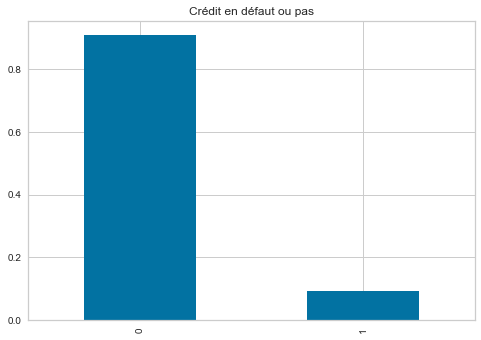

In [44]:
# Distribution de 'TARGET' AVANT équilibrage

print(at['TARGET'].value_counts())
p_100 = at['TARGET'].value_counts(normalize=True)*100    # "normalize=True" pour avoir des %
print("\n", p_100)
at['TARGET'].value_counts(normalize=True).plot.bar(title="Crédit en défaut ou pas")


In [40]:
# mise à l’echelle (feature Scaling)                    TEST

# from sklearn.preprocessing import StandardScaler
# import matplotlib.pyplot as plt
# import matplotlib


# def plotGraph(pdf, pscaled_df):
#     fig, (a, b) = plt.subplots(ncols=2, figsize=(16, 5))
#     a.set_title("Avant mise à l'echelle")
#     for col in pdf.columns:
#         sns.kdeplot(pdf[col], ax=a)
#     b.set_title("Apres mise à l'echelle")
#     for col in pdf.columns:
#         sns.kdeplot(pscaled_df[col], ax=b)
#     plt.show()
# scaler = StandardScaler()

# X = at.drop(['TARGET'], 1)
# keepCols = X.columns

# scaled_df = scaler.fit_transform(at[keepCols])
# scaled_df = pd.DataFrame(scaled_df, columns=keepCols)
# plotGraph(at[keepCols], scaled_df)

In [45]:
# SMOTE is applied to oversample minority class during cross validation.
from numpy import mean
from imblearn.under_sampling import RandomUnderSampler
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from collections import Counter
from imblearn.pipeline import Pipeline
from imblearn.over_sampling import SMOTE

# define dataset
X = at.drop(['TARGET'], 1)
y = at['TARGET']

# summarize class distribution
counter = Counter(y)
print(counter)

# define pipeline
over = SMOTE(sampling_strategy=0.2)                   # oversample  la classe mino. 20% de la classe majo = 20%4633 = 926
under = RandomUnderSampler(sampling_strategy=0.6)     # undersample la classe majo, 100/50 fois plus que la classe mino
# Counter({0: 4633, 1: 467})

steps = [('over', over), ('under', under)]
# steps = [('over', over)]                      # avec 0.2, 0.3(ko), 0.4, 0.5, 0.6, 0.7
pipeline = Pipeline(steps=steps)

# transform the dataset
X, y = pipeline.fit_resample(X, y)

# summarize class distribution
counter = Counter(y)
print(counter)

at = X.join(y)

# Counter({0: 4633, 1: 467})
#
# Counter({0: 4630, 1: 926})  0.2, 0.2 (100/20) donc multiplié par 5
# Counter({0: 1852, 1: 926})  0.2, 0.5 (100/50)
# Counter({0: 926,  1: 926})  0.2,   1 (100/100)

# Counter({0: 1852, 1: 926})  0.2, 0.5 (100/50) -> Random Forest Classifier
# Avec ce choix d'équilibrage, On passe d'un rapport de 1/10 à un raport de 1/2
#                                                                           AUC     F1      Seuil     Accuracy
# Counter({0: 3086, 1: 926})  0.2, 0.3       ->  Random Forest Classifier   0.8680  0.5814  0.5       0.8561
# Counter({0: 2315, 1: 926})  0.2, 0.4       ->  Random Forest Classifier   0.8740  0.6139  0.5       0.8408
# Counter({0: 1852, 1: 926})  0.2, 0.5       ->  Random Forest Classifier   0.8609  0.6685  0.5299    0.8122
# Counter({0: 1543, 1: 926})  0.2, 0.6       ->  Random Forest Classifier   0.8664  0.7148  0.5898    0.8021
# Counter({0: 1322, 1: 926})  0.2, 0.7       ->  Extra Trees Classifier     0.8626  0.7265  0.405     0.8023
# Counter({0: 1157, 1: 926})  0.2, 0.8       ->  Random Forest Classifier   0.8688  0.7407  0.5504    0.7921
# Counter({0: 1028, 1: 926})  0.2, 0.9       ->  Extra Trees Classifier     0.8638  0.764Z  0.5504    0.7703
# Counter({0: 926,  1: 926})  0.2, 1.0       ->  Extra Trees Classifier     0.8499  0.7578  0.5303    0.7894

# On va certes vers un dataset de +en+ équilibré mais où il y a - d'observations !


Counter({0: 4633, 1: 467})
Counter({0: 1543, 1: 926})


0    1543
1     926
Name: TARGET, dtype: int64

 0    62.494937
1    37.505063
Name: TARGET, dtype: float64


<AxesSubplot:title={'center':'Crédit en défaut ou pas'}>

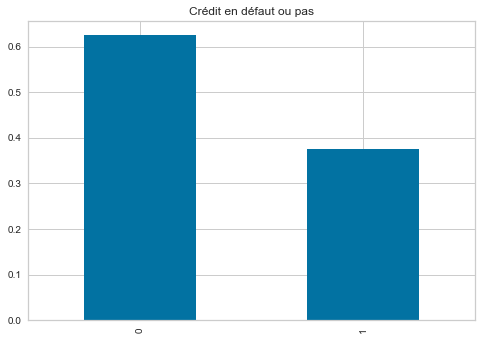

In [47]:
# Distribution de 'TARGET' APRES équilibrage

print(at['TARGET'].value_counts())
p_100 = at['TARGET'].value_counts(normalize=True)*100    # "normalize=True" pour avoir des %
print("\n", p_100)
at['TARGET'].value_counts(normalize=True).plot.bar(title="Crédit en défaut ou pas")


# Création du modèle

In [34]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix

import pickle     # pour stocker le modèle
from pycaret.classification import *
# print(pycaret.__version__)   # 2.3.1

In [48]:
at.shape

(2469, 57)

### Recherche du meilleur modèle

In [49]:
exp_clf102 = setup(data = at, target = 'TARGET',      # 'data','target' seuls paramètres obligatoires.
                  #fix_imbalance = True,              # active l'équilibrage avec SMOTE par défaut
                  preprocess = False)

rf = compare_models(fold = 10,      # Number of folds to be used in cross validation
                      sort = "AUC")   # recherche du modèle avec le meilleur AUC (option F1)


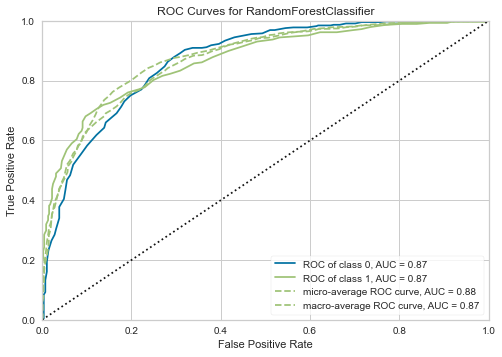

In [50]:
plot_model(rf, plot='auc')   # Courbe ROC

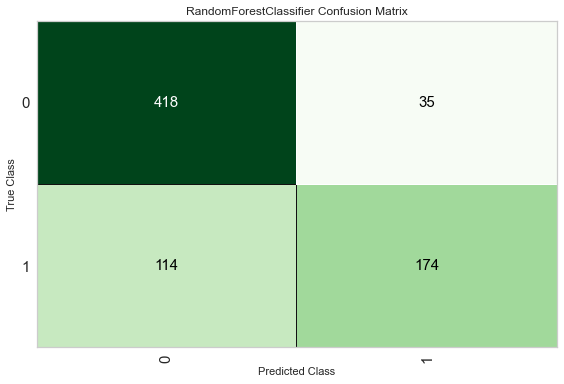

Optimized Probability Threshold: 0.45480000000000004 | Optimized Cost Function: 193038


0.45480000000000004

In [52]:
plot_model(rf, plot='confusion_matrix')
optimize_threshold(rf, true_negative = 418, false_positive = -35,
                         false_negative = -114, true_positive = 174)


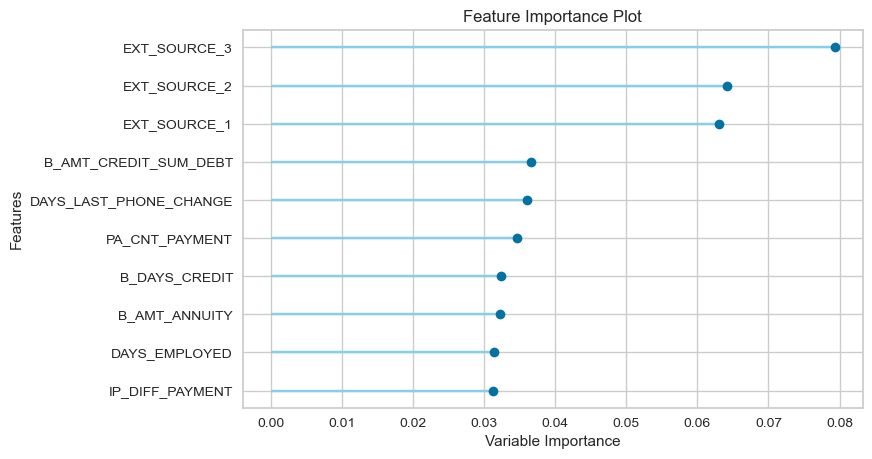

In [232]:
plot_model(rf, plot='feature')


In [238]:
interpret_model(rf, plot = 'reason', observation = 10)

In [197]:
rf

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=-1, oob_score=False, random_state=5284, verbose=0,
                       warm_start=False)

### SHAP

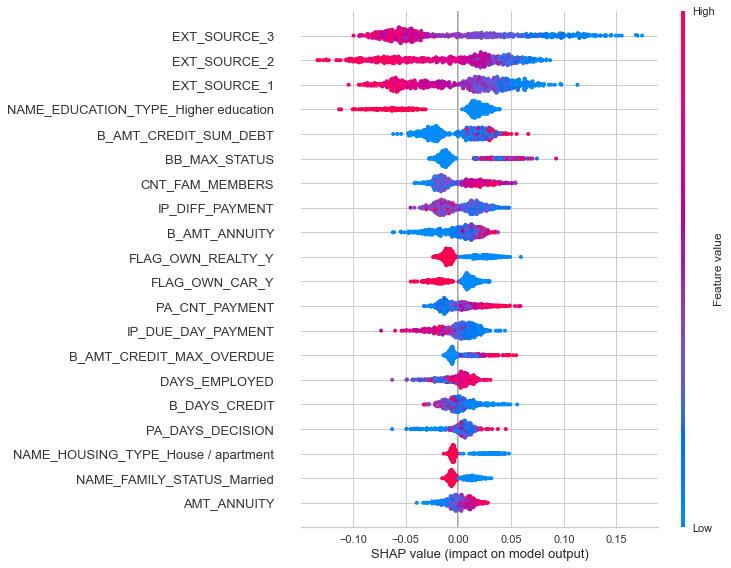

In [230]:
import shap
from sklearn.model_selection import train_test_split
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import RandomForestClassifier

train_X, val_X, train_y, val_y = train_test_split(X, y, random_state=1)
X = at.drop(['TARGET'], 1)
y = at['TARGET']

clf = RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=-1, oob_score=False, random_state=8670, verbose=0,
                       warm_start=False)
clf.fit(train_X, train_y)


# Create object that can calculate shap values
explainer = shap.TreeExplainer(clf)

# calculate shap values. This is what we will plot.
# Calculate shap_values for all of val_X rather than a single row, to have more data for plot.
shap_values = explainer.shap_values(val_X)

# Make plot. Index of [1] is explained in text below.
shap.summary_plot(shap_values[1], val_X)


In [245]:
# Poids des variables

pd.set_option('display.max_row', 200)
feature_weight = pd.DataFrame({'Feature': get_config('X_train').columns, 'Value' : \
                               abs(rf.feature_importances_)}).sort_values(by='Value', ascending=False)
feature_weight


Feature     Value
31                                       EXT_SOURCE_3  0.074058
30                                       EXT_SOURCE_2  0.066464
29                                       EXT_SOURCE_1  0.065629
53                                 IP_DUE_DAY_PAYMENT  0.036652
38                                      B_DAYS_CREDIT  0.035898
51                                     PA_CNT_PAYMENT  0.034922
50                                   PA_DAYS_DECISION  0.033418
43                              B_AMT_CREDIT_SUM_DEBT  0.033261
36                             DAYS_LAST_PHONE_CHANGE  0.031123
25                                      DAYS_EMPLOYED  0.030681
49                                      PA_AMT_CREDIT  0.030213
45                                      B_AMT_ANNUITY  0.030119
23                         REGION_POPULATION_RELATIVE  0.029632
42                                   B_AMT_CREDIT_SUM  0.029543
54                                    IP_DIFF_PAYMENT  0.028978
22                                    AMT_GOODS_PRICE  0.028970
20                                         AMT_CREDIT  0.028030
48                                     PA_AMT_ANNUITY  0.027777
21                                        AMT_ANNUITY  0.027385
19                                   AMT_INCOME_TOTAL  0.026822
24                                         DAYS_BIRTH  0.025844
26                                    CNT_FAM_MEMBERS  0.024385
40                           B_AMT_CREDIT_MAX_OVERDUE  0.016910
47                                      BB_MAX_STATUS  0.016615
34                           OBS_60_CNT_SOCIAL_CIRCLE  0.015660
5                NAME_EDUCATION_TYPE_Higher education  0.014860
32                           OBS_30_CNT_SOCIAL_CIRCLE  0.014421
52                                         CCB_SK_DPD  0.011433
55                                     PCB_SK_DPD_DEF  0.011350
1                                      FLAG_OWN_CAR_Y  0.009715
13                NAME_HOUSING_TYPE_House / apartment  0.009631
2                                   FLAG_OWN_REALTY_Y  0.008794
8   NAME_EDUCATION_TYPE_Secondary / secondary special  0.008613
33                           DEF_30_CNT_SOCIAL_CIRCLE  0.007916
9                          NAME_FAMILY_STATUS_Married  0.007571
27                               REGION_RATING_CLIENT  0.006719
0                                       CODE_GENDER_M  0.006665
18                                       CNT_CHILDREN  0.006318
35                           DEF_60_CNT_SOCIAL_CIRCLE  0.006026
46                                      BB_MIN_STATUS  0.005416
4                            NAME_INCOME_TYPE_Working  0.004678
28                        REGION_RATING_CLIENT_W_CITY  0.004326
37                                        NB_DOCUMENT  0.004166
11            NAME_FAMILY_STATUS_Single / not married  0.003507
3                      NAME_INCOME_TYPE_State servant  0.003197
6               NAME_EDUCATION_TYPE_Incomplete higher  0.003032
10                       NAME_FAMILY_STATUS_Separated  0.002457
17                     NAME_HOUSING_TYPE_With parents  0.001745
41                               B_CNT_CREDIT_PROLONG  0.001735
14              NAME_HOUSING_TYPE_Municipal apartment  0.001615
16                 NAME_HOUSING_TYPE_Rented apartment  0.001350
44                           B_AMT_CREDIT_SUM_OVERDUE  0.001203
12                           NAME_FAMILY_STATUS_Widow  0.000954
39                               B_CREDIT_DAY_OVERDUE  0.000795
7                 NAME_EDUCATION_TYPE_Lower secondary  0.000621
15                 NAME_HOUSING_TYPE_Office apartment  0.000184

### Sauvegarde du modèle

In [239]:
pickle.dump(rf, open("C:\\Users\\loic\\PycharmProjects\\projet7dashboard\\rf_for_deployment", 'wb'))
pickle.dump(rf, open("C:\\Users\\loic\\PycharmProjects\\P7_api\\rf_for_deployment", 'wb'))
pickle.dump(rf, open("C:\\Users\\loic\\Documents\\FORMATION\\Data Scientist\\Projet_7\\rf_for_deployment", 'wb'))

### Prédiction

In [235]:
pd.set_option('display.max_row', 5000)

# Bilan du modèle (avec sklearn)
pm = predict_model(rf, probability_threshold=0.6291)
pm


CODE_GENDER_M FLAG_OWN_CAR_Y FLAG_OWN_REALTY_Y  \
0               1              1                 1   
1               0              1                 1   
2               0              0                 0   
3               1              0                 0   
4               0              0                 1   
5               1              0                 1   
6               0              1                 1   
7               0              0                 1   
8               0              0                 1   
9               1              0                 0   
10              1              0                 1   
11              1              0                 1   
12              0              0                 1   
13              1              1                 1   
14              0              0                 1   
15              0              0                 0   
16              1              0                 0   
17              1              1                 0   
18              0              0                 0   
19              0              1                 0   
20              0              0                 1   
21              0              0                 0   
22              0              0                 1   
23              1              1                 1   
24              1              0                 1   
25              1              0                 1   
26              0              1                 1   
27              0              1                 0   
28              0              0                 0   
29              0              0                 0   
30              0              1                 1   
31              0              0                 1   
32              1              0                 1   
33              1              0                 1   
34              1              0                 1   
35              0              0                 0   
36              0              0                 1   
37              1              0                 0   
38              0              0                 1   
39              0              0                 1   
40              1              0                 1   
41              0              0                 0   
42              1              0                 0   
43              0              0                 0   
44              0              0                 1   
45              0              0                 0   
46              0              1                 1   
47              1              1                 0   
48              0              0                 1   
49              0              0                 1   
50              1              0                 0   
51              0              0                 1   
52              0              1                 0   
53              0              0                 0   
54              0              1                 1   
55              0              0                 1   
56              0              0                 1   
57              0              1                 1   
58              0              1                 1   
59              0              0                 1   
60              1              0                 1   
61              1              1                 0   
62              0              0                 1   
63              0              1                 0   
64              0              0                 0   
65              0              0                 1   
66              0              0                 1   
67              0              0                 1   
68              0              1                 1   
69              1              0                 1   
70              0              0                 1   
71              0              1                 1   
72              0              1                 1   
73      

In [246]:
pd.set_option('display.max_row', 6000)

# 1. Prédiction sur UN individu du dataset de test ([0] => le 1er individu) :
predictions = predict_model(rf, pd.DataFrame(atest,index=[0]))
print("Label :", predictions.Label[0])   # étiquette(0/1)
print("Proba :", predictions.Score[0])   # probabilité

# predict_model(rf, probability_threshold=0.6291)

# 2. Prédiction sur TOUS les individus du dataset de test :
predictions = predict_model(rf, atest)
predictions



Label : 0
Proba : 0.65


CODE_GENDER_M  FLAG_OWN_CAR_Y  FLAG_OWN_REALTY_Y  \
0                 0               0                  1   
1                 0               1                  1   
2                 1               1                  1   
3                 0               1                  1   
4                 0               1                  1   
5                 0               1                  1   
6                 0               0                  1   
7                 1               1                  1   
8                 0               1                  1   
9                 0               0                  0   
10                0               0                  1   
11                0               0                  0   
12                0               0                  0   
13                0               0                  0   
14                1               0                  1   
15                1               1                  1   
16                1               0                  0   
17                1               1                  1   
18                1               0                  0   
19                0               1                  1   
20                1               1                  1   
21                0               0                  1   
22                0               0                  0   
23                1               1                  0   
24                0               1                  1   
25                1               1                  0   
26                0               0                  0   
27                0               0                  1   
28                1               1                  1   
29                1               0                  0   
30                0               0                  0   
31                0               0                  0   
32                0               0                  1   
33                0               0                  0   
34                0               0                  0   
35                0               0                  1   
36                0               1                  0   
37                0               0                  1   
38                1               1                  0   
39                0               0                  0   
40                0               1                  1   
41                1               0                  0   
42                0               1                  0   
43                0               1                  1   
44                0               1                  0   
45                1               0                  1   
46                0               0                  0   
47                1               0                  1   
48                0               0                  1   
49                0               1                  1   
50                0               0                  0   
51                0               0                  1   
52                0               0                  1   
53                0               0                  0   
54                0               0                  1   
55                1               0                  1   
56                1               1                  0   
57                0               0                  0   
58                0               1                  1   
59                1               0                  0   
60                0               0                  1   
61                0               0                  0   
62                0               0                  1   
63                1               0                  1   
64                0               1                  1   
65                1               1                  1   
66                0               1                  1   
67                0               0                  1   
68  

# TESTS

In [53]:
# Chargement du modèle
mod = pickle.load(open('rf_for_deployment','rb'))         # provient de pickle.dump()
predict_model(mod, pd.DataFrame(atest,index=[0]))


CODE_GENDER_M  FLAG_OWN_CAR_Y  FLAG_OWN_REALTY_Y  \
0              0               0                  1   

   NAME_INCOME_TYPE_State servant  NAME_INCOME_TYPE_Working  \
0                               0                         1   

   NAME_EDUCATION_TYPE_Higher education  \
0                                     0   

   NAME_EDUCATION_TYPE_Incomplete higher  NAME_EDUCATION_TYPE_Lower secondary  \
0                                      0                                    0   

   NAME_EDUCATION_TYPE_Secondary / secondary special  \
0                                                  1   

   NAME_FAMILY_STATUS_Married  ...  PA_AMT_ANNUITY  PA_AMT_CREDIT  \
0                           1  ...        8091.585        92920.5   

   PA_DAYS_DECISION  PA_CNT_PAYMENT  CCB_SK_DPD  IP_DUE_DAY_PAYMENT  \
0               531       11.333333         0.0                 3.0   

   IP_DIFF_PAYMENT  PCB_SK_DPD_DEF  Label  Score  
0      -622.550708             0.0      0   0.62  

[1 rows x 58 columns]

In [54]:
# Option 1
prev = mod.predict(pd.DataFrame(atest,index=[0]))    # (index=8 > label=1) ; (index=0 > label=0)
prev      # array([0])
print("Classe prédite=", prev[0])
print("Proba pour les classes 0 et 1 respectivement :", mod.predict_proba(pd.DataFrame(atest, index=[0])))
print("Avec une probabilité de :", mod.predict_proba(pd.DataFrame(atest, index=[0]))[0][prev[0]], "\n")


Classe prédite= 0
Proba pour les classes 0 et 1 respectivement : [[0.62 0.38]]
Avec une probabilité de : 0.62 

